256


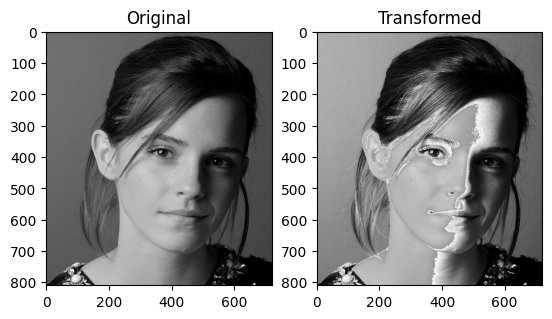

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Breakpoints from the graph (input, output)
c = np.array([(50, 50), (150, 255), (150, 150)])

# Create a lookup table (LUT) based on the breakpoints
# The LUT will map input pixel values to output pixel values
t1 = np.linspace(0, c[0,1], c[0,0] + 1, dtype=np.uint8)
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0], dtype=np.uint8)
t3 = np.linspace(c[2,1] + 1, 255, 255 - c[2,0], dtype=np.uint8)

# Concatenate segments to form the complete LUT
# Each segment corresponds to a range of input pixel values
transform = np.concatenate((t1, t2), axis=0)
transform = np.concatenate((transform, t3), axis=0).astype(np.uint8)
print(len(transform))  

# Load image (grayscale)
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply LUT
image_transformed = cv.LUT(img_orig, transform)

# Display results
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed')
plt.show()
